In [1]:
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.analyses import Correlations
from auditory_cortex.models import Regression
from auditory_cortex.neural_data.neural_meta_data import NeuralMetaData
from auditory_cortex.dataloader import DataLoader

import torch
import numpy as np
import seaborn as sns
import scipy

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline

/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [2]:
dataloader = DataLoader()
model_name = 'deepspeech2'
dnn_obj = dataloader.get_DNN_obj(model_name)

Model on device: cuda


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/pytorch_lightning/utilities/migration/migration.py:203: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
Lightning automatically upgraded your loaded checkpoint from v1.1.5 to v2.0.8. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../depot/jgmakin/data/auditory_cortex/results/pretrained_weights/deepspeech2/librispeech_pretrained_v3.ckpt`
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argum

In [3]:
state_dict = dnn_obj.extractor.model.state_dict()
for k,v in state_dict.items():
	state_dict[k] = v.cpu().numpy()


In [3]:
import os
from auditory_cortex import cache_dir
weights_factor = 1
state_dict_path = os.path.join(cache_dir, model_name, 'shuffled', f'shuffled_weights_factor_{weights_factor}.pth')
state_dict = dnn_obj.extractor.model.state_dict()
# for k,v in state_dict.items():
# 	state_dict[k] = v.cpu().numpy()
# torch.save(state_dict, state_dict_path)

In [24]:
state_dict = torch.load(state_dict_path)

In [ ]:
state_dict.keys()

In [6]:
feat = state_dict['conv.seq_module.0.weight']

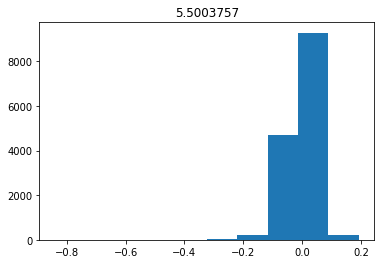

In [7]:
plt.hist(feat.flatten())
plt.title(np.linalg.norm(feat))
plt.show()

In [ ]:
scaled_param = feat*100
plt.hist(scaled_param.flatten())
plt.title(np.linalg.norm(scaled_param))
plt.show()

In [ ]:
plt.hist(feat.flatten())
plt.title(np.linalg.norm(feat))
plt.show()

In [ ]:
dataloader = DataLoader()
model_name = 'deepspeech2'
dnn_obj = dataloader.get_DNN_obj(model_name)

In [ ]:
dnn_obj.layer_names

In [10]:
layers_with_weights = [
    'conv.seq_module.0.weight',
    'conv.seq_module.3.weight',
    'rnns.0.rnn.weight_ih_l0',
    # 'rnns.0.rnn.weight_hh_l0',
    'rnns.1.rnn.weight_ih_l0',
    'rnns.2.rnn.weight_ih_l0',
    'rnns.3.rnn.weight_ih_l0',
    'rnns.4.rnn.weight_ih_l0',
    'fc.0.module.0.weight',
]


In [ ]:
dataloader = DataLoader()
model_name = 'deepspeech2'
dnn_obj = dataloader.get_DNN_obj(model_name)

num_layers = len(layers_with_weights)
fig, axes = plt.subplots(nrows=2, ncols=num_layers, figsize=(16,8))

i = 0
for j, layer_name in enumerate(layers_with_weights):
    weights = dnn_obj.extractor.model.state_dict()[layer_name].flatten().cpu().numpy()
    norm = np.linalg.norm(weights)

    ax = axes[i, j]
    ax.hist(weights)
    ax.set_title(f"{norm:.2f}")
    ax.set_yticks([])

# reset weights..
out = dnn_obj.reset_model_parameters()
i = 1
for j, layer_name in enumerate(layers_with_weights):
    weights = dnn_obj.extractor.model.state_dict()[layer_name].flatten().cpu().numpy()
    norm = np.linalg.norm(weights)

    ax = axes[i, j]
    ax.hist(weights)
    ax.set_title(f"{norm:.2f}")
    ax.set_yticks([])

In [ ]:
dict([*dnn_obj.extractor.model.named_modules()])

In [65]:
def compare_weight_initializations(model_name, layer_name):
    dataloader = DataLoader()
    dnn_obj = dataloader.get_DNN_obj(model_name)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

    # layer_name = 'conv.seq_module.0.weight'

    weights = dnn_obj.extractor.model.state_dict()[layer_name].flatten().cpu().numpy()
    norm = np.linalg.norm(weights)

    i=0
    ax = axes[i//2, i%2]
    ax.hist(weights)
    ax.set_title(f"original Norm={norm:.2f}")

    # reset weights..
    out = dnn_obj.reset_model_parameters()
    weights = dnn_obj.extractor.model.state_dict()[layer_name].flatten().cpu().numpy()
    norm = np.linalg.norm(weights)

    i=1
    ax = axes[i//2, i%2]
    ax.hist(weights)
    ax.set_title(f"reset Norm={norm:.2f}")

    # randn weights..
    out = dnn_obj.randomly_reinitialize_weights(False)
    weights = dnn_obj.extractor.model.state_dict()[layer_name].flatten().cpu().numpy()
    norm = np.linalg.norm(weights)

    i=2
    ax = axes[i//2, i%2]
    ax.hist(weights)
    ax.set_title(f"randn Norm={norm:.2f}")

    # rand weights..
    out = dnn_obj.randomly_reinitialize_weights(True)
    weights = dnn_obj.extractor.model.state_dict()[layer_name].flatten().cpu().numpy()
    norm = np.linalg.norm(weights)

    i=3
    ax = axes[i//2, i%2]
    ax.hist(weights)
    ax.set_title(f"rand Norm={norm:.2f}")

    plt.suptitle(layer_name)

    

In [ ]:
model_name = 'deepspeech2'
layer_name = 'conv.seq_module.0.weight'
compare_weight_initializations(model_name, layer_name)

In [ ]:
model_name = 'deepspeech2'
layer_name = 'conv.seq_module.0.bias'
compare_weight_initializations(model_name, layer_name)

In [ ]:
model_name = 'deepspeech2'
layer_name = 'conv.seq_module.3.weight'
compare_weight_initializations(model_name, layer_name)

In [ ]:
model_name = 'deepspeech2'
layer_name = 'conv.seq_module.3.bias'
compare_weight_initializations(model_name, layer_name)

### whisper_tiny..

In [ ]:
dataloader = DataLoader()
model_name = 'whisper_tiny'
dnn_obj = dataloader.get_DNN_obj(model_name)

In [ ]:
dict([*dnn_obj.extractor.model.named_modules()])

In [ ]:
dataloader = DataLoader()
model_name = 'speech2text'
dnn_obj = dataloader.get_DNN_obj(model_name)
dict([*dnn_obj.extractor.model.named_modules()])

In [ ]:
dataloader = DataLoader()
model_name = 'deepspeech2'
dnn_obj = dataloader.get_DNN_obj(model_name)
dict([*dnn_obj.extractor.model.named_modules()])

In [ ]:
model_name = 'whisper_tiny'
layer_name = 'model.encoder.conv1.weight'
compare_weight_initializations(model_name, layer_name)

In [ ]:
model_name = 'whisper_tiny'
layer_name = 'model.encoder.conv2.weight'
compare_weight_initializations(model_name, layer_name)

In [ ]:
model_name = 'whisper_tiny'
layer_name = 'model.encoder.layers.0.fc1.weight'
compare_weight_initializations(model_name, layer_name)

### wav2letter

In [ ]:
model_name = 'wav2letter_modified'
layer_name = 'conv1.conv.weight'
compare_weight_initializations(model_name, layer_name)

In [ ]:
model_name = 'wav2letter_modified'
layer_name = 'conv2.conv.weight'
compare_weight_initializations(model_name, layer_name)

In [ ]:
model_name = 'wav2letter_modified'
layer_name = 'conv6.conv.weight'
compare_weight_initializations(model_name, layer_name)

In [ ]:
dataloader = DataLoader()
model_name = 'wav2letter_modified'
dnn_obj = dataloader.get_DNN_obj(model_name)

In [ ]:
dict([*dnn_obj.extractor.model.named_modules()])

In [ ]:
dnn_obj.extractor.model.state_dict()['conv1.conv.weight']